In [1]:
import numpy as np
import networkx as nx
import pandas as pd
import os
import matplotlib.pyplot as plt

## Step 0: Data verification

In [2]:
path = "C:/Users/sqshy/Desktop/University/Fifth Year/research/DistortionSim/ijcaidata/theta5unitsum.csv"
test_df = pd.read_csv(path)
test_df = test_df.drop(columns=['Unnamed: 0','id'])
test_df

,val_index,size,valuation,algo,distortion
0,1,5,theta5unitsum,serial_dictatorship,1.159725
1,1,5,theta5unitsum,ttc_matching,1.159725
2,1,5,theta5unitsum,epsilon_max_matching pareto1,1.125891
3,1,5,theta5unitsum,epsilon_max_matching pareto0.1,1.000000
4,1,5,theta5unitsum,updated_hybrid_max_matching,1.159725
...,...,...,...,...,...
2495,500,100,theta5unitsum,serial_dictatorship,1.124143
2496,500,100,theta5unitsum,ttc_matching,1.124143
2497,500,100,theta5unitsum,epsilon_max_matching pareto1,1.082306
2498,500,100,theta5unitsum,epsilon_max_matching pareto0.1,1.006831


In [3]:
test_df.isna().to_numpy().any() #check for nans

False

In [4]:
test_df[test_df['distortion'] < 0.99] #check for bad values

,val_index,size,valuation,algo,distortion


In [5]:
algorithms = set(test_df['algo'])
df_list = {}
for algorithm in algorithms:
    df_list[algorithm] = test_df[test_df['algo']==algorithm]
    
for (key, index) in [(key, df_list[key]['distortion'].argmax()) for key in df_list.keys()]:
    print(df_list[key].iloc[index])

val_index                               66
size                                     5
valuation                    theta5unitsum
algo          epsilon_max_matching pareto1
distortion                         1.18764
Name: 327, dtype: object
val_index                              33
size                                    5
valuation                   theta5unitsum
algo          updated_hybrid_max_matching
distortion                        1.86257
Name: 164, dtype: object
val_index                                226
size                                      20
valuation                      theta5unitsum
algo          epsilon_max_matching pareto0.1
distortion                           1.00989
Name: 1128, dtype: object
val_index                      33
size                            5
valuation           theta5unitsum
algo          serial_dictatorship
distortion                1.86257
Name: 160, dtype: object
val_index                33
size                      5
valuation     theta5uni

In [6]:
test_df[(test_df['algo']=='epsilon_max_matching pareto1') & (test_df['distortion'] > 2)]

,val_index,size,valuation,algo,distortion


In [7]:
test_df[(test_df['algo']=='epsilon_max_matching pareto0.1') & (test_df['distortion'] > 1.1)]

,val_index,size,valuation,algo,distortion


## Step 1: Data collection

In [8]:
path = "C:/Users/sqshy/Desktop/University/Fifth Year/research/DistortionSim/ijcaidata"
data_files = [path+"/"+item for item in os.listdir(path) if 'instances' not in item and 'fair' not in item and 'max' not in item]

data_files

['C:/Users/sqshy/Desktop/University/Fifth Year/research/DistortionSim/ijcaidata/theta0.2unitrange.csv',
 'C:/Users/sqshy/Desktop/University/Fifth Year/research/DistortionSim/ijcaidata/theta0.2unitsum.csv',
 'C:/Users/sqshy/Desktop/University/Fifth Year/research/DistortionSim/ijcaidata/theta1unitrange.csv',
 'C:/Users/sqshy/Desktop/University/Fifth Year/research/DistortionSim/ijcaidata/theta1unitsum.csv',
 'C:/Users/sqshy/Desktop/University/Fifth Year/research/DistortionSim/ijcaidata/theta5unitrange.csv',
 'C:/Users/sqshy/Desktop/University/Fifth Year/research/DistortionSim/ijcaidata/theta5unitsum.csv']

In [9]:
df_list = []

for item in data_files:
    if 'fair' not in item and 'max' not in item: # filter for pareto only
        df_list.append(pd.read_csv(item))
    else:
        temp_df = pd.read_csv(item)
              
        temp_df = temp_df[~temp_df['algo'].isin(['ttc_matching','serial_dictatorship'])]
        
        if 'range' in item:
            if 'rangefair' in item:
                to_append = 'fair'
            elif 'rangemaxcard' in item:
                to_append = 'maxcard'
            elif 'rangermax' in item:
                to_append = 'rmax'
            
        temp_df.loc[temp_df.algo == 'modified_max_matching', 'algo'] = 'modified_max_matching '+to_append
        
        print(item, set(temp_df['algo']))
        
        df_list.append(temp_df)
    
df = pd.concat(df_list)
df.index = list(range(len(df)))
df = df.drop(columns=['Unnamed: 0','id'])
df = df[~pd.isna(df['val_index'])]
df

,val_index,size,valuation,algo,distortion
0,1,5,theta0.2unitrange,serial_dictatorship,1.189135
1,1,5,theta0.2unitrange,ttc_matching,1.172955
2,1,5,theta0.2unitrange,epsilon_max_matching pareto1,1.000000
3,1,5,theta0.2unitrange,epsilon_max_matching pareto0.1,1.000000
4,1,5,theta0.2unitrange,modified_max_matching,1.000000
...,...,...,...,...,...
14995,500,100,theta5unitsum,serial_dictatorship,1.124143
14996,500,100,theta5unitsum,ttc_matching,1.124143
14997,500,100,theta5unitsum,epsilon_max_matching pareto1,1.082306
14998,500,100,theta5unitsum,epsilon_max_matching pareto0.1,1.006831


In [10]:
df.loc[(df.val_index.isin(range(1,101))), 'size'] = 5.0
df.loc[(df.val_index.isin(range(101,201))), 'size'] = 10.0
df.loc[(df.val_index.isin(range(201,301))), 'size'] = 20.0
df.loc[(df.val_index.isin(range(301,401))), 'size'] = 50.0
df.loc[(df.val_index.isin(range(401,501))), 'size'] = 100.0
df

,val_index,size,valuation,algo,distortion
0,1,5,theta0.2unitrange,serial_dictatorship,1.189135
1,1,5,theta0.2unitrange,ttc_matching,1.172955
2,1,5,theta0.2unitrange,epsilon_max_matching pareto1,1.000000
3,1,5,theta0.2unitrange,epsilon_max_matching pareto0.1,1.000000
4,1,5,theta0.2unitrange,modified_max_matching,1.000000
...,...,...,...,...,...
14995,500,100,theta5unitsum,serial_dictatorship,1.124143
14996,500,100,theta5unitsum,ttc_matching,1.124143
14997,500,100,theta5unitsum,epsilon_max_matching pareto1,1.082306
14998,500,100,theta5unitsum,epsilon_max_matching pareto0.1,1.006831


In [11]:
df = df[df['distortion'] > 0.99]
algorithms = set(df['algo'])
df_list = {}
for algorithm in algorithms:
    df_list[algorithm] = df[df['algo']==algorithm]

In [12]:
df_list.keys()

dict_keys(['epsilon_max_matching pareto1', 'updated_hybrid_max_matching', 'modified_max_matching', 'epsilon_max_matching pareto0.1', 'serial_dictatorship', 'ttc_matching'])

In [13]:
for key in df_list.keys():
    print(key, df_list[key]['distortion'].argmax())

epsilon_max_matching pareto1 2053
updated_hybrid_max_matching 84
modified_max_matching 1106
epsilon_max_matching pareto0.1 1074
serial_dictatorship 1556
ttc_matching 2532


## Maxima and minima analysis

In [14]:
for (key, index) in [(key, df_list[key]['distortion'].argmax()) for key in df_list.keys()]:
    print(df_list[key].iloc[index])

val_index                               54
size                                     5
valuation                  theta5unitrange
algo          epsilon_max_matching pareto1
distortion                         1.18993
Name: 10267, dtype: object
val_index                              85
size                                    5
valuation                 theta0.2unitsum
algo          updated_hybrid_max_matching
distortion                        3.24725
Name: 2924, dtype: object
val_index                       107
size                             10
valuation           theta5unitrange
algo          modified_max_matching
distortion                  1.47137
Name: 10534, dtype: object
val_index                                 75
size                                       5
valuation                    theta1unitrange
algo          epsilon_max_matching pareto0.1
distortion                           1.01194
Name: 5373, dtype: object
val_index                      57
size                          

In [15]:
for (key, index) in [(key, df_list[key]['distortion'].argmin()) for key in df_list.keys()]:
    print(df_list[key].iloc[index])

val_index                              193
size                                    10
valuation                    theta1unitsum
algo          epsilon_max_matching pareto1
distortion                               1
Name: 8462, dtype: object
val_index                              53
size                                    5
valuation                   theta5unitsum
algo          updated_hybrid_max_matching
distortion                        1.00079
Name: 12764, dtype: object
val_index                        42
size                              5
valuation         theta0.2unitrange
algo          modified_max_matching
distortion                        1
Name: 209, dtype: object
val_index                                376
size                                      50
valuation                  theta0.2unitrange
algo          epsilon_max_matching pareto0.1
distortion                                 1
Name: 1878, dtype: object
val_index                      42
size                            

In [58]:
#TODO write a function for generating plots so you don't have to do this in future
templist = []
for key in df_list.keys():
    frame = df_list[key].groupby(['size', 'valuation']).mean()
    frame['size'] = [item[0] for item in frame.index]
    frame['valuation'] = [item[1] for item in frame.index]
    frame['algo'] = [key]*len(frame)
    frame.index = list(range(len(frame)))
    frame = frame.drop(columns=['val_index'])
    templist.append(frame)
    
df_avg = pd.concat(templist)
df_avg.index = list(range(len(df_avg)))
df_avg

templist = []
for key in df_list.keys():
    frame = df_list[key].groupby(['size', 'valuation']).var()
    frame['size'] = [item[0] for item in frame.index]
    frame['valuation'] = [item[1] for item in frame.index]
    frame['algo'] = [key]*len(frame)
    frame.index = list(range(len(frame)))
    frame = frame.drop(columns=['val_index'])
    templist.append(frame)
    
df_var = pd.concat(templist)
df_var.index = list(range(len(df_var)))
df_var

templist = []
for key in df_list.keys():
    frame = df_list[key].groupby(['size', 'valuation']).min()
    frame['size'] = [item[0] for item in frame.index]
    frame['valuation'] = [item[1] for item in frame.index]
    frame['algo'] = [key]*len(frame)
    frame.index = list(range(len(frame)))
    frame = frame.drop(columns=['val_index'])
    templist.append(frame)
    
df_min = pd.concat(templist)
df_min.index = list(range(len(df_min)))
df_min

templist = []
for key in df_list.keys():
    frame = df_list[key].groupby(['size', 'valuation']).max()
    frame['size'] = [item[0] for item in frame.index]
    frame['valuation'] = [item[1] for item in frame.index]
    frame['algo'] = [key]*len(frame)
    frame.index = list(range(len(frame)))
    frame = frame.drop(columns=['val_index'])
    templist.append(frame)
    
df_max = pd.concat(templist)
df_max.index = list(range(len(df_max)))
df_max

,algo,distortion,size,valuation
0,epsilon_max_matching pareto1,1.104132,5,theta0.2unitrange
1,epsilon_max_matching pareto1,1.112650,5,theta0.2unitsum
2,epsilon_max_matching pareto1,1.100642,5,theta1unitrange
3,epsilon_max_matching pareto1,1.125265,5,theta1unitsum
4,epsilon_max_matching pareto1,1.189926,5,theta5unitrange
...,...,...,...,...
145,ttc_matching,1.195098,100,theta0.2unitsum
146,ttc_matching,1.133616,100,theta1unitrange
147,ttc_matching,1.151572,100,theta1unitsum
148,ttc_matching,1.129410,100,theta5unitrange


## Graphs of data


### unit-sum, $\theta=0.2$

In [59]:
curr = df_avg[(df_avg['valuation']=='theta0.2unitsum')]
curr = curr.pivot(index='size', columns = 'algo', values='distortion')
curr

algo,epsilon_max_matching pareto0.1,epsilon_max_matching pareto1,serial_dictatorship,ttc_matching,updated_hybrid_max_matching
size,,,,,
5,1.000140,1.013743,1.118151,1.117257,1.713347
10,1.000195,1.021178,1.117599,1.116752,1.798875
20,1.001131,1.030066,1.129065,1.131565,1.846776
50,1.001344,1.040815,1.164097,1.162327,1.629909
100,1.002085,1.066886,1.158815,1.161386,1.437124


<AxesSubplot:title={'center':'unit-sum, theta=0.2, mean'}, xlabel='size'>

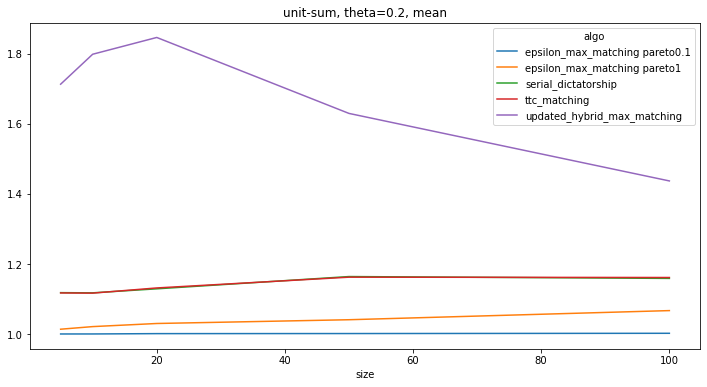

In [60]:
curr.plot(figsize=(12,6),title='unit-sum, theta=0.2, mean')

In [50]:
curr = df_var[(df_var['valuation']=='theta0.2unitsum')]
curr = curr.pivot(index='size', columns = 'algo', values='distortion')
curr

algo,epsilon_max_matching pareto0.1,epsilon_max_matching pareto1,serial_dictatorship,ttc_matching,updated_hybrid_max_matching
size,,,,,
5,6.903096e-07,0.000713,0.016469,0.017910,0.229719
10,1.409467e-06,0.000522,0.006317,0.005621,0.154159
20,2.316212e-06,0.000176,0.001812,0.002081,0.055766
50,8.791768e-07,0.000100,0.000795,0.000724,0.005260
100,6.323405e-07,0.000062,0.000234,0.000206,0.000813


<AxesSubplot:title={'center':'unit-sum, theta=0.2, variance'}, xlabel='size'>

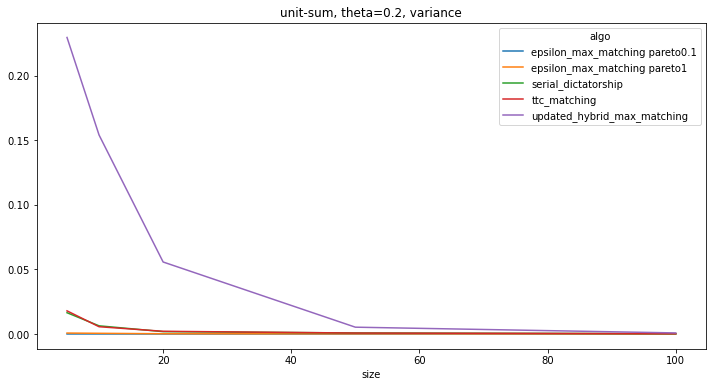

In [52]:
curr.plot(figsize=(12,6),title='unit-sum, theta=0.2, variance')

In [54]:
curr = df_min[(df_min['valuation']=='theta0.2unitsum')]
curr = curr.pivot(index='size', columns = 'algo', values='distortion')
curr

algo,epsilon_max_matching pareto0.1,epsilon_max_matching pareto1,serial_dictatorship,ttc_matching,updated_hybrid_max_matching
size,,,,,
5,1.000000,1.000000,1.000000,1.000000,1.024572
10,1.000000,1.000000,1.000000,1.000000,1.259260
20,1.000000,1.002797,1.037884,1.036172,1.392421
50,1.000000,1.019935,1.110977,1.097511,1.502886
100,1.000478,1.049881,1.121896,1.131779,1.358101


<AxesSubplot:title={'center':'unit-sum, theta=0.2, min'}, xlabel='size'>

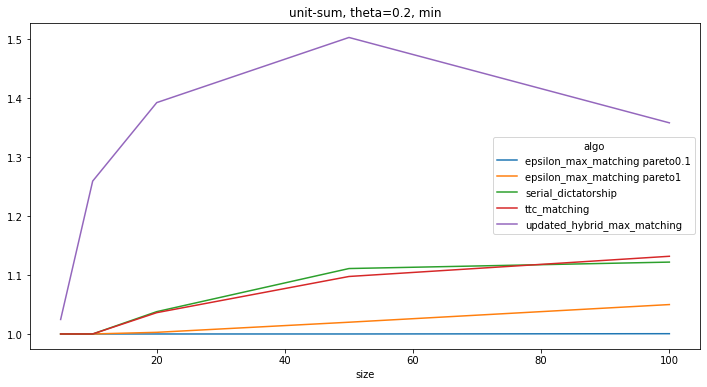

In [55]:
curr.plot(figsize=(12,6),title='unit-sum, theta=0.2, min')

In [56]:
curr = df_max[(df_max['valuation']=='theta0.2unitsum')]
curr = curr.pivot(index='size', columns = 'algo', values='distortion')
curr

algo,epsilon_max_matching pareto0.1,epsilon_max_matching pareto1,serial_dictatorship,ttc_matching,updated_hybrid_max_matching
size,,,,,
5,1.007533,1.112650,1.615497,1.709345,3.247253
10,1.010981,1.112208,1.348651,1.335647,3.078005
20,1.006740,1.057866,1.227557,1.264798,2.769866
50,1.004276,1.062339,1.242261,1.231082,1.883979
100,1.005008,1.088187,1.202954,1.195098,1.521564


<AxesSubplot:title={'center':'unit-sum, theta=0.2, max'}, xlabel='size'>

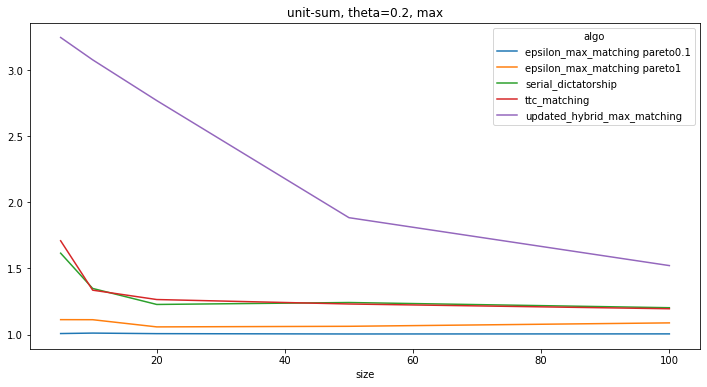

In [57]:
curr.plot(figsize=(12,6),title='unit-sum, theta=0.2, max')

### unit-sum, $\theta=1$


In [62]:
curr = df_avg[(df_avg['valuation']=='theta1unitsum')]
curr = curr.pivot(index='size', columns = 'algo', values='distortion')
curr

algo,epsilon_max_matching pareto0.1,epsilon_max_matching pareto1,serial_dictatorship,ttc_matching,updated_hybrid_max_matching
size,,,,,
5,1.000244,1.015905,1.200433,1.204175,1.517056
10,1.000372,1.031337,1.246178,1.245109,1.466182
20,1.001308,1.053412,1.224929,1.226532,1.356861
50,1.002850,1.069047,1.167344,1.167638,1.221570
100,1.004692,1.078771,1.128133,1.127976,1.154839


<AxesSubplot:title={'center':'unit-sum, theta=1, mean'}, xlabel='size'>

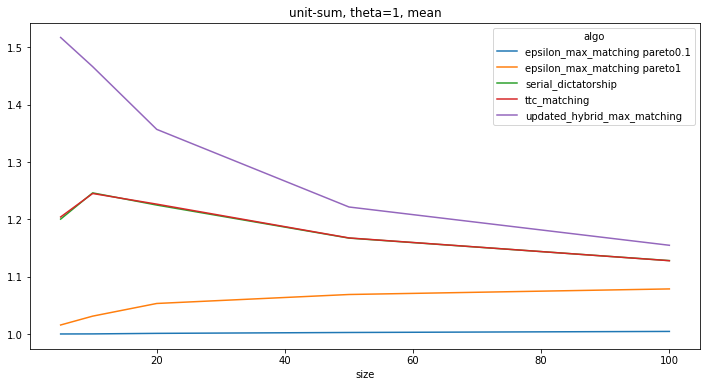

In [63]:
curr.plot(figsize=(12,6),title='unit-sum, theta=1, mean')

In [64]:
curr = df_var[(df_var['valuation']=='theta1unitsum')]
curr = curr.pivot(index='size', columns = 'algo', values='distortion')
curr

algo,epsilon_max_matching pareto0.1,epsilon_max_matching pareto1,serial_dictatorship,ttc_matching,updated_hybrid_max_matching
size,,,,,
5,9.519989e-07,0.000742,0.027702,0.026605,0.111653
10,1.116225e-06,0.000753,0.010341,0.010556,0.024486
20,3.134468e-06,0.000421,0.002027,0.002006,0.004208
50,1.636218e-06,0.000098,0.000304,0.000277,0.000291
100,1.166147e-06,0.000046,0.000086,0.000087,0.000096


<AxesSubplot:title={'center':'unit-sum, theta=1, var'}, xlabel='size'>

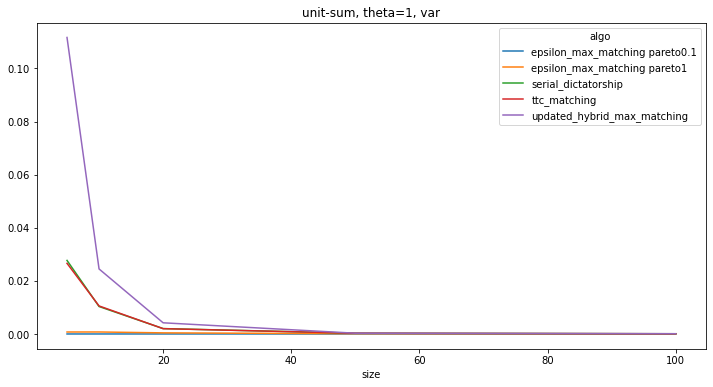

In [65]:
curr.plot(figsize=(12,6),title='unit-sum, theta=1, var')

In [66]:
curr = df_min[(df_min['valuation']=='theta1unitsum')]
curr = curr.pivot(index='size', columns = 'algo', values='distortion')
curr

algo,epsilon_max_matching pareto0.1,epsilon_max_matching pareto1,serial_dictatorship,ttc_matching,updated_hybrid_max_matching
size,,,,,
5,1.000000,1.000000,1.000000,1.000000,1.035261
10,1.000000,1.000000,1.046931,1.046931,1.211641
20,1.000000,1.014748,1.123233,1.124921,1.242916
50,1.000203,1.037685,1.131661,1.137683,1.175882
100,1.002235,1.064832,1.103117,1.103149,1.133683


<AxesSubplot:title={'center':'unit-sum, theta=1, min'}, xlabel='size'>

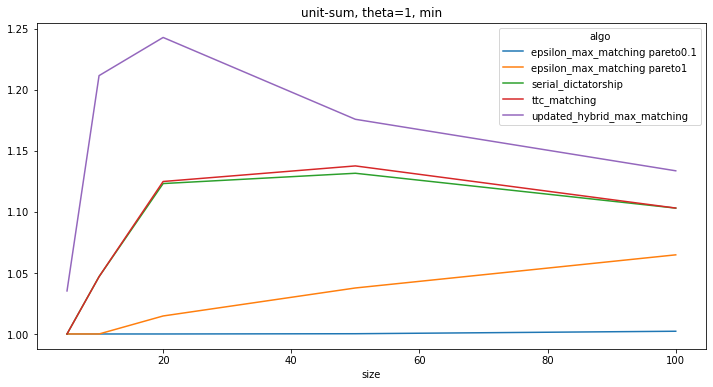

In [67]:
curr.plot(figsize=(12,6),title='unit-sum, theta=1, min')

In [68]:
curr = df_max[(df_max['valuation']=='theta1unitsum')]
curr = curr.pivot(index='size', columns = 'algo', values='distortion')
curr

algo,epsilon_max_matching pareto0.1,epsilon_max_matching pareto1,serial_dictatorship,ttc_matching,updated_hybrid_max_matching
size,,,,,
5,1.005669,1.125265,1.988262,1.850643,2.610231
10,1.006356,1.113673,1.520838,1.592749,1.985776
20,1.007555,1.104174,1.334729,1.326471,1.547658
50,1.006844,1.097587,1.220037,1.218180,1.266827
100,1.007341,1.101359,1.154472,1.151572,1.180732


<AxesSubplot:title={'center':'unit-sum, theta=1, max'}, xlabel='size'>

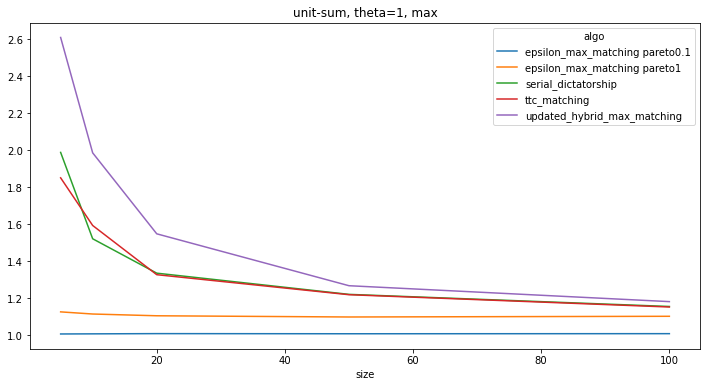

In [69]:
curr.plot(figsize=(12,6),title='unit-sum, theta=1, max')

### unit-sum, $\theta = 5$

In [70]:
curr = df_avg[(df_avg['valuation']=='theta5unitsum')]
curr = curr.pivot(index='size', columns = 'algo', values='distortion')
curr

algo,epsilon_max_matching pareto0.1,epsilon_max_matching pareto1,serial_dictatorship,ttc_matching,updated_hybrid_max_matching
size,,,,,
5,1.000368,1.028536,1.272530,1.272530,1.278327
10,1.001117,1.044284,1.256307,1.256307,1.257456
20,1.002207,1.067965,1.229468,1.229468,1.229789
50,1.004631,1.072854,1.160775,1.160775,1.161651
100,1.006039,1.076182,1.121255,1.121254,1.121516


<AxesSubplot:title={'center':'unit-sum, theta=5, mean'}, xlabel='size'>

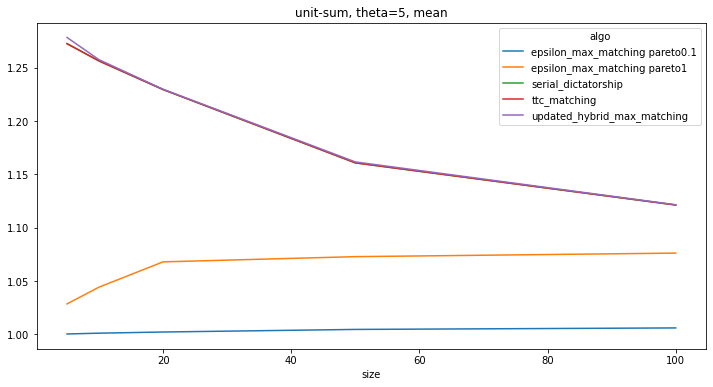

In [71]:
curr.plot(figsize=(12,6),title='unit-sum, theta=5, mean')

In [72]:
curr = df_var[(df_var['valuation']=='theta5unitsum')]
curr = curr.pivot(index='size', columns = 'algo', values='distortion')
curr

algo,epsilon_max_matching pareto0.1,epsilon_max_matching pareto1,serial_dictatorship,ttc_matching,updated_hybrid_max_matching
size,,,,,
5,1.734937e-06,0.001566,0.028856,0.028856,0.028705
10,3.799474e-06,0.000806,0.007815,0.007815,0.007679
20,4.179611e-06,0.000354,0.001765,0.001765,0.001754
50,1.811879e-06,0.000095,0.000345,0.000345,0.000354
100,8.894163e-07,0.000044,0.000063,0.000063,0.000062


<AxesSubplot:title={'center':'unit-sum, theta=5, var'}, xlabel='size'>

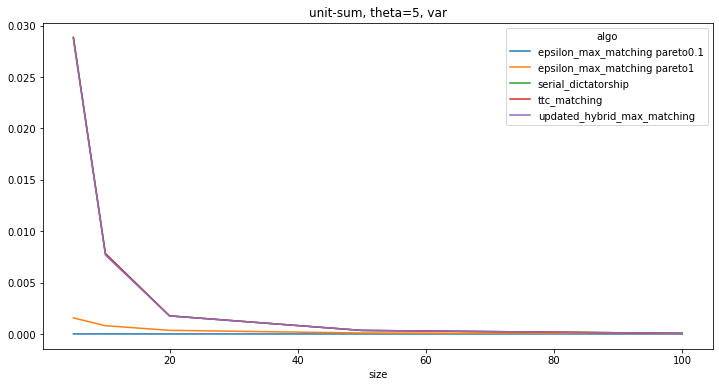

In [73]:
curr.plot(figsize=(12,6),title='unit-sum, theta=5, var')

In [74]:
curr = df_min[(df_min['valuation']=='theta5unitsum')]
curr = curr.pivot(index='size', columns = 'algo', values='distortion')
curr

algo,epsilon_max_matching pareto0.1,epsilon_max_matching pareto1,serial_dictatorship,ttc_matching,updated_hybrid_max_matching
size,,,,,
5,1.000000,1.000000,1.000795,1.000795,1.000795
10,1.000000,1.000000,1.073405,1.073405,1.073405
20,1.000000,1.028000,1.118475,1.118475,1.118475
50,1.001628,1.047720,1.117122,1.117122,1.117122
100,1.003350,1.060747,1.103547,1.103547,1.104389


<AxesSubplot:title={'center':'unit-sum, theta=5, min'}, xlabel='size'>

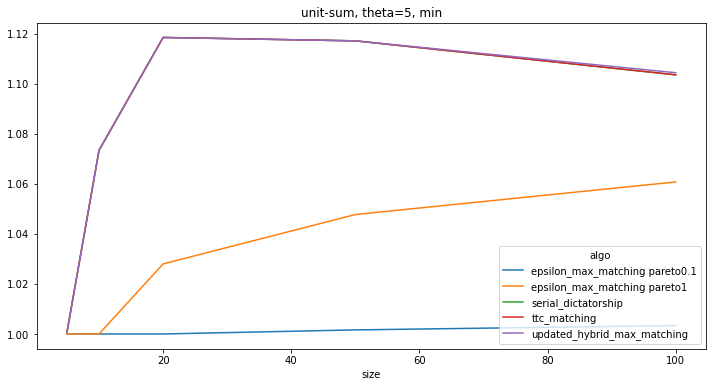

In [75]:
curr.plot(figsize=(12,6),title='unit-sum, theta=5, min')

In [76]:
curr = df_max[(df_max['valuation']=='theta5unitsum')]
curr = curr.pivot(index='size', columns = 'algo', values='distortion')
curr

algo,epsilon_max_matching pareto0.1,epsilon_max_matching pareto1,serial_dictatorship,ttc_matching,updated_hybrid_max_matching
size,,,,,
5,1.008719,1.187639,1.862567,1.862567,1.862567
10,1.009458,1.114185,1.520199,1.520199,1.520199
20,1.009889,1.117305,1.333070,1.333070,1.333070
50,1.008176,1.094581,1.207264,1.207264,1.208162
100,1.008748,1.093224,1.142865,1.142865,1.142865


<AxesSubplot:title={'center':'unit-sum, theta=5, max'}, xlabel='size'>

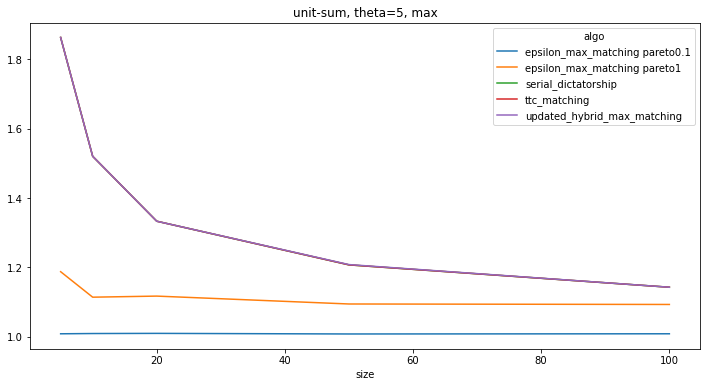

In [77]:
curr.plot(figsize=(12,6),title='unit-sum, theta=5, max')

### unit-range, $\theta=0.2$

In [78]:
curr = df_avg[(df_avg['valuation']=='theta0.2unitrange')]
curr = curr.pivot(index='size', columns = 'algo', values='distortion')
curr

algo,epsilon_max_matching pareto0.1,epsilon_max_matching pareto1,modified_max_matching,serial_dictatorship,ttc_matching
size,,,,,
5,1.000186,1.011401,1.050614,1.143749,1.127345
10,1.000480,1.020553,1.059827,1.114272,1.113699
20,1.000735,1.034043,1.101971,1.124223,1.131807
50,1.001373,1.051151,1.139072,1.155574,1.153748
100,1.002337,1.062290,1.141065,1.149166,1.152354


<AxesSubplot:title={'center':'unit-range, theta=0.2, mean'}, xlabel='size'>

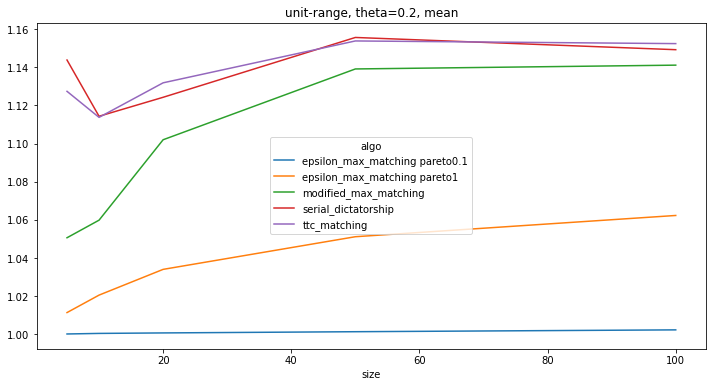

In [79]:
curr.plot(figsize=(12,6), title='unit-range, theta=0.2, mean')

In [80]:
curr = df_var[(df_var['valuation']=='theta0.2unitrange')]
curr = curr.pivot(index='size', columns = 'algo', values='distortion')
curr

algo,epsilon_max_matching pareto0.1,epsilon_max_matching pareto1,modified_max_matching,serial_dictatorship,ttc_matching
size,,,,,
5,8.825425e-07,0.000492,0.005133,0.017359,0.014775
10,1.995110e-06,0.000495,0.001484,0.006327,0.005575
20,1.707689e-06,0.000246,0.001057,0.001487,0.002204
50,1.094044e-06,0.000136,0.000326,0.000574,0.000508
100,8.476447e-07,0.000055,0.000147,0.000227,0.000201


<AxesSubplot:title={'center':'unit-range, theta=0.2, var'}, xlabel='size'>

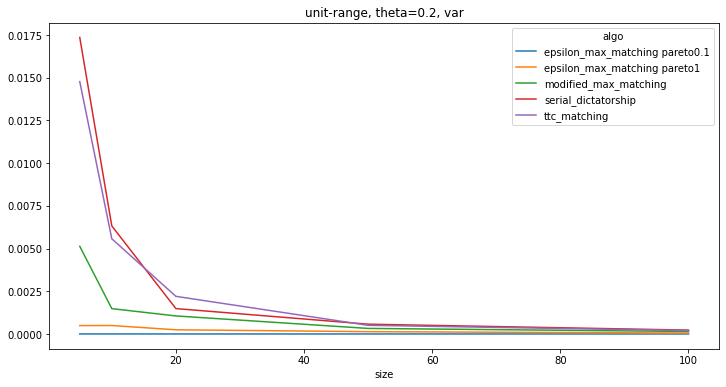

In [81]:
curr.plot(figsize=(12,6), title='unit-range, theta=0.2, var')

In [82]:
curr = df_min[(df_min['valuation']=='theta0.2unitrange')]
curr = curr.pivot(index='size', columns = 'algo', values='distortion')
curr

algo,epsilon_max_matching pareto0.1,epsilon_max_matching pareto1,modified_max_matching,serial_dictatorship,ttc_matching
size,,,,,
5,1.000000,1.000000,1.000000,1.000000,1.000000
10,1.000000,1.000000,1.000000,1.000000,1.000000
20,1.000000,1.006662,1.013961,1.046352,1.024973
50,1.000000,1.028538,1.099617,1.104242,1.100569
100,1.000516,1.044204,1.115271,1.116470,1.123267


<AxesSubplot:title={'center':'unit-range, theta=0.2, min'}, xlabel='size'>

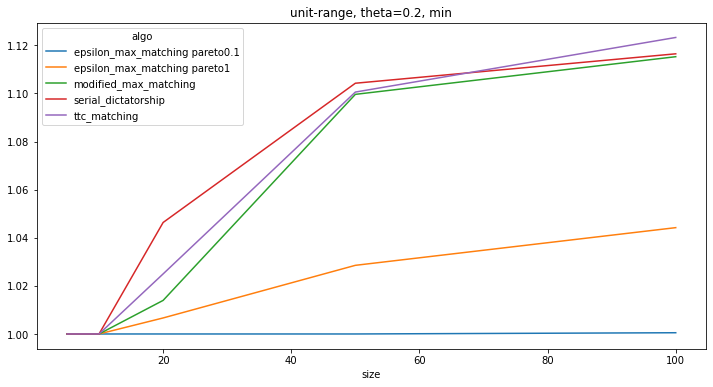

In [83]:
curr.plot(figsize=(12,6), title='unit-range, theta=0.2, min')

In [84]:
curr = df_max[(df_max['valuation']=='theta0.2unitrange')]
curr = curr.pivot(index='size', columns = 'algo', values='distortion')
curr

algo,epsilon_max_matching pareto0.1,epsilon_max_matching pareto1,modified_max_matching,serial_dictatorship,ttc_matching
size,,,,,
5,1.007280,1.104132,1.295607,1.588088,1.592950
10,1.008658,1.081414,1.166068,1.385901,1.278371
20,1.006410,1.084359,1.212967,1.245055,1.271050
50,1.004446,1.079313,1.192132,1.217813,1.217323
100,1.005301,1.077459,1.168297,1.185395,1.183187


<AxesSubplot:title={'center':'unit-range, theta=0.2, max'}, xlabel='size'>

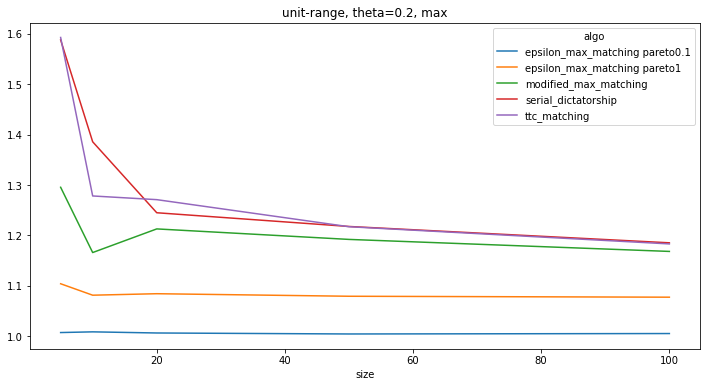

In [85]:
curr.plot(figsize=(12,6), title='unit-range, theta=0.2, max')

### unit-range, $\theta=1$

In [86]:
curr = df_avg[(df_avg['valuation']=='theta1unitrange')]
curr = curr.pivot(index='size', columns = 'algo', values='distortion')
curr

algo,epsilon_max_matching pareto0.1,epsilon_max_matching pareto1,modified_max_matching,serial_dictatorship,ttc_matching
size,,,,,
5,1.000311,1.016383,1.064301,1.174685,1.163471
10,1.000723,1.026853,1.117659,1.208351,1.206608
20,1.001211,1.047606,1.156849,1.197192,1.197005
50,1.002671,1.063028,1.140519,1.147008,1.147589
100,1.004916,1.064866,1.109529,1.115231,1.114998


<AxesSubplot:title={'center':'unit-range, theta=1, mean'}, xlabel='size'>

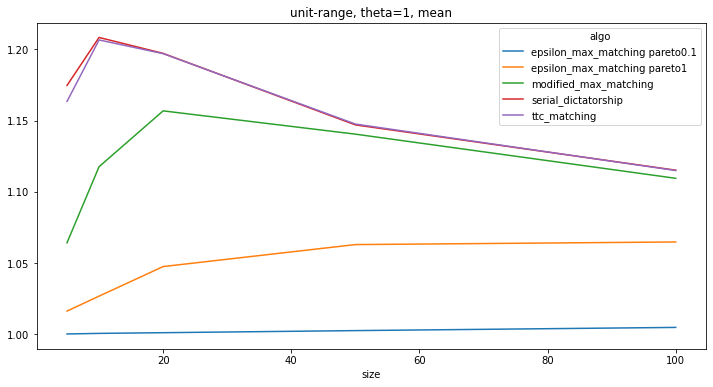

In [87]:
curr.plot(figsize=(12,6), title='unit-range, theta=1, mean')

In [88]:
curr = df_var[(df_var['valuation']=='theta1unitrange')]
curr = curr.pivot(index='size', columns = 'algo', values='distortion')
curr

algo,epsilon_max_matching pareto0.1,epsilon_max_matching pareto1,modified_max_matching,serial_dictatorship,ttc_matching
size,,,,,
5,0.000002,0.000687,0.006101,0.020514,0.015414
10,0.000002,0.000583,0.003978,0.007920,0.006689
20,0.000002,0.000363,0.001453,0.001672,0.001753
50,0.000001,0.000106,0.000230,0.000234,0.000242
100,0.000001,0.000029,0.000056,0.000062,0.000065


<AxesSubplot:title={'center':'unit-range, theta=1, var'}, xlabel='size'>

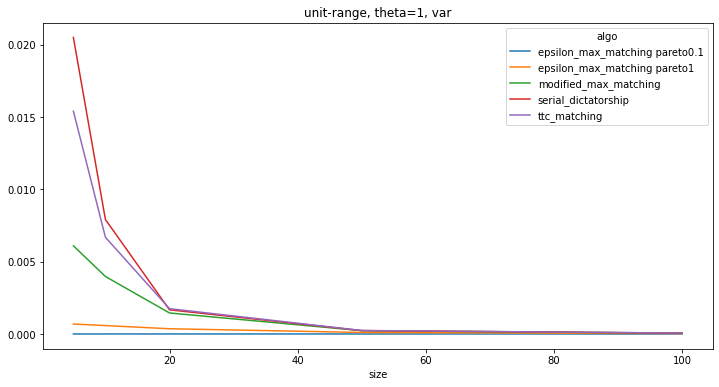

In [89]:
curr.plot(figsize=(12,6), title='unit-range, theta=1, var')

In [90]:
curr = df_min[(df_min['valuation']=='theta1unitrange')]
curr = curr.pivot(index='size', columns = 'algo', values='distortion')
curr

algo,epsilon_max_matching pareto0.1,epsilon_max_matching pareto1,modified_max_matching,serial_dictatorship,ttc_matching
size,,,,,
5,1.000000,1.000000,1.000000,1.000000,1.000000
10,1.000000,1.000000,1.009330,1.049799,1.049799
20,1.000000,1.010090,1.064605,1.116649,1.107737
50,1.000098,1.042672,1.104671,1.119502,1.107965
100,1.002576,1.053830,1.091094,1.093091,1.091171


<AxesSubplot:title={'center':'unit-range, theta=1, min'}, xlabel='size'>

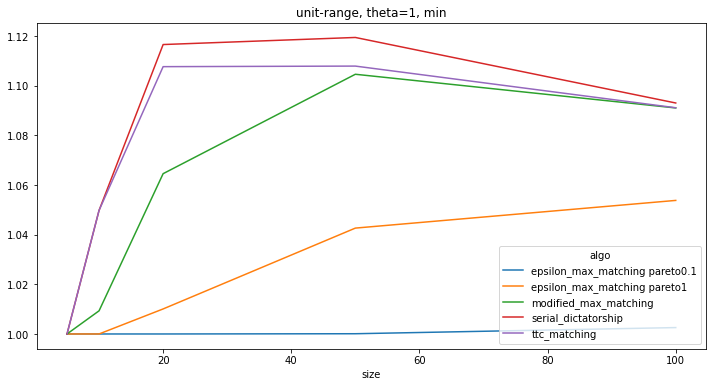

In [91]:
curr.plot(figsize=(12,6), title='unit-range, theta=1, min')

In [92]:
curr = df_max[(df_max['valuation']=='theta1unitrange')]
curr = curr.pivot(index='size', columns = 'algo', values='distortion')
curr

algo,epsilon_max_matching pareto0.1,epsilon_max_matching pareto1,modified_max_matching,serial_dictatorship,ttc_matching
size,,,,,
5,1.011945,1.100642,1.334767,1.820594,1.581284
10,1.006452,1.124436,1.337583,1.482937,1.482937
20,1.007613,1.091788,1.268693,1.330046,1.321417
50,1.006316,1.088413,1.173626,1.187065,1.187916
100,1.008209,1.077779,1.129967,1.133299,1.133616


<AxesSubplot:title={'center':'unit-range, theta=1, max'}, xlabel='size'>

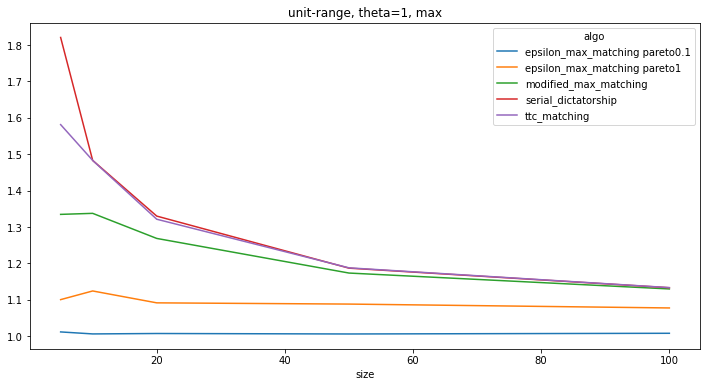

In [93]:
curr.plot(figsize=(12,6), title='unit-range, theta=1, max')

### unit-range, $\theta = 5$

In [94]:
curr = df_avg[(df_avg['valuation']=='theta5unitrange')]
curr = curr.pivot(index='size', columns = 'algo', values='distortion')
curr

algo,epsilon_max_matching pareto0.1,epsilon_max_matching pareto1,modified_max_matching,serial_dictatorship,ttc_matching
size,,,,,
5,1.000363,1.024487,1.102438,1.249679,1.249679
10,1.001203,1.051349,1.175948,1.231610,1.231610
20,1.002521,1.066757,1.177479,1.191384,1.191384
50,1.004775,1.066053,1.137464,1.140792,1.140792
100,1.006105,1.063296,1.104855,1.107721,1.107722


<AxesSubplot:title={'center':'unit-range, theta=5, mean'}, xlabel='size'>

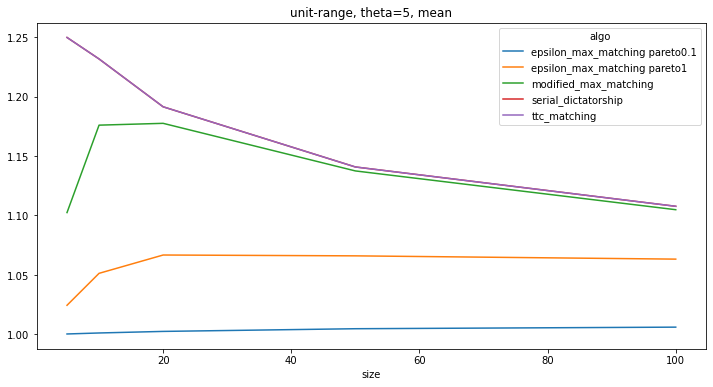

In [96]:
curr.plot(figsize=(12,6), title='unit-range, theta=5, mean')

In [97]:
curr = df_var[(df_var['valuation']=='theta5unitrange')]
curr = curr.pivot(index='size', columns = 'algo', values='distortion')
curr

algo,epsilon_max_matching pareto0.1,epsilon_max_matching pareto1,modified_max_matching,serial_dictatorship,ttc_matching
size,,,,,
5,2.452489e-06,0.001067,0.007301,0.025601,0.025601
10,4.600401e-06,0.000826,0.005546,0.005204,0.005204
20,4.721910e-06,0.000275,0.001179,0.001395,0.001395
50,2.547027e-06,0.000092,0.000210,0.000186,0.000186
100,9.922653e-07,0.000026,0.000041,0.000051,0.000051


<AxesSubplot:title={'center':'unit-range, theta=5, var'}, xlabel='size'>

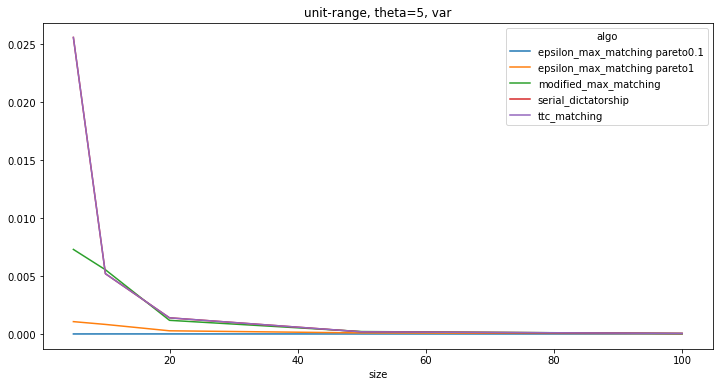

In [98]:
curr.plot(figsize=(12,6), title='unit-range, theta=5, var')

In [99]:
curr = df_min[(df_min['valuation']=='theta5unitrange')]
curr = curr.pivot(index='size', columns = 'algo', values='distortion')
curr

algo,epsilon_max_matching pareto0.1,epsilon_max_matching pareto1,modified_max_matching,serial_dictatorship,ttc_matching
size,,,,,
5,1.000000,1.000000,1.000000,1.000000,1.000000
10,1.000000,1.000000,1.045626,1.081178,1.081178
20,1.000000,1.024500,1.106488,1.112784,1.112784
50,1.001104,1.045095,1.104516,1.109695,1.109695
100,1.004133,1.052803,1.090622,1.093522,1.093522


<AxesSubplot:title={'center':'unit-range, theta=5, min'}, xlabel='size'>

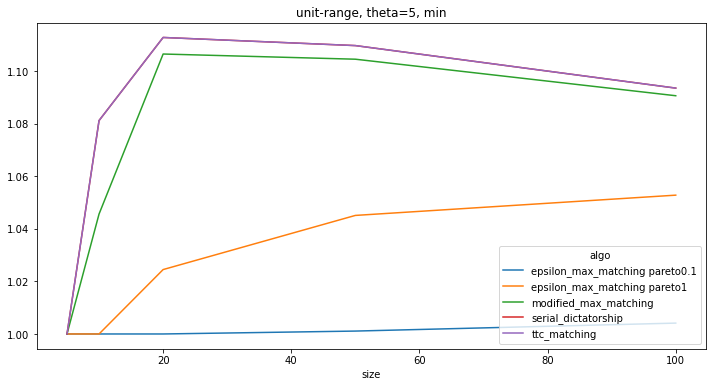

In [100]:
curr.plot(figsize=(12,6), title='unit-range, theta=5, min')

In [101]:
curr = df_max[(df_max['valuation']=='theta5unitrange')]
curr = curr.pivot(index='size', columns = 'algo', values='distortion')
curr

algo,epsilon_max_matching pareto0.1,epsilon_max_matching pareto1,modified_max_matching,serial_dictatorship,ttc_matching
size,,,,,
5,1.008845,1.189926,1.406036,1.817094,1.817094
10,1.010534,1.147869,1.471370,1.416895,1.416895
20,1.007966,1.110477,1.298456,1.269601,1.269601
50,1.009423,1.100367,1.170295,1.192710,1.192710
100,1.008684,1.076119,1.127820,1.129410,1.129410


<AxesSubplot:title={'center':'unit-range, theta=5, max'}, xlabel='size'>

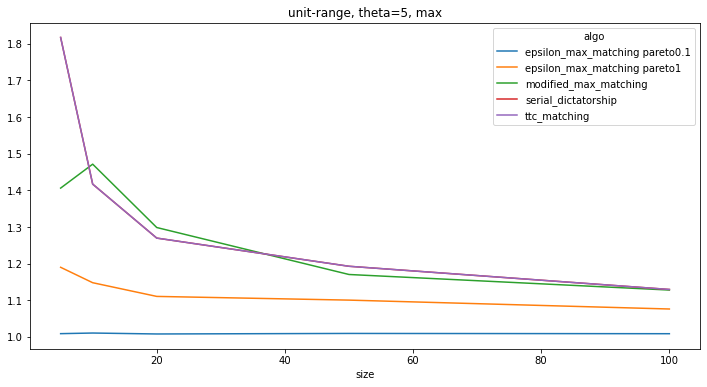

In [102]:
curr.plot(figsize=(12,6), title='unit-range, theta=5, max')